# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** M Dicky Desriansyah
- **Email:** muhammaddq16@gmail.com
- **ID Dicoding:** mdickyd

## Menentukan Pertanyaan Bisnis

- Apakah ada peristiwa/kejadian penting yang secara signifikan memengaruhi jumlah penyewaan sepeda?

- Siapa yang lebih cenderung menggunakan sepeda, pengguna casual atau terdaftar, di bawah berbagai kondisi cuaca dan waktu?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd       # untuk manipulasi data
import numpy as np        # untuk operasi numerik
import matplotlib.pyplot as plt  # untuk visualisasi data
import seaborn as sns     # untuk visualisasi yang lebih menarik
import statsmodels.api as sm  # untuk analisis statistik
from sklearn.model_selection import train_test_split  # untuk membagi data
from sklearn.linear_model import LinearRegression      # untuk regresi linear
from sklearn.metrics import mean_squared_error, r2_score  # untuk evaluasi model
import datetime          # untuk manipulasi tanggal dan waktu

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

In [2]:
# Mengunduh dan membaca data
hour_data = pd.read_csv('/content/drive/MyDrive/Dataset/hour.csv')
day_data = pd.read_csv('/content/drive/MyDrive/Dataset/day.csv')

-  Mengunduh Data: Saya mengunduh dua file dataset yaitu hour.csv dan day.csv dari sumber yang disediakan.

-  Membaca Data ke dalam DataFrame: Saya menggunakan library pandas untuk membaca file CSV dan mengimpornya ke dalam DataFrame agar lebih mudah untuk diproses.

### Assessing Data

In [3]:
# Memeriksa struktur data
print(hour_data.head())
print(day_data.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01   

In [4]:
# Memeriksa tipe data dan nilai hilang
print(hour_data.info())
print(day_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeI

-  **Memeriksa Struktur Data**: Saya menggunakan fungsi .head() untuk melihat beberapa baris pertama dari setiap DataFrame dan memastikan bahwa data terstruktur dengan baik.

-  **Memeriksa Tipe Data dan Nilai Hilang**: Saya menggunakan fungsi .info() untuk memeriksa tipe data setiap kolom dan mencari nilai yang hilang, yang membantu saya memahami kondisi awal data.

### Cleaning Data

In [5]:
# Menghapus duplikasi
hour_data.drop_duplicates(inplace=True)
day_data.drop_duplicates(inplace=True)

# Menangani nilai hilang
hour_data.fillna(method='ffill', inplace=True) # Mengisi nilai hilang dengan metode forward fill
day_data.fillna(method='ffill', inplace=True) # Sama dengan yang diatas

<ipython-input-5-a89d4572075e>:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hour_data.fillna(method='ffill', inplace=True) # Mengisi nilai hilang dengan metode forward fill
<ipython-input-5-a89d4572075e>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  day_data.fillna(method='ffill', inplace=True) # Sama dengan yang diatas


- **Menghapus Duplikasi**: Saya memeriksa dan menghapus baris yang mungkin duplikat untuk memastikan integritas data.

- **Menangani Nilai Hilang**: Saya mengidentifikasi nilai hilang dan memutuskan untuk mengisi atau menghapusnya berdasarkan konteks data agar tidak mempengaruhi analisis.

## Exploratory Data Analysis (EDA)

### Explore ...

In [6]:
# Membuat daftar tanggal penting
important_dates = ['2012-10-30']

In [7]:
# Menambahkan kolom untuk menandai peristiwa penting
hour_data['event'] = np.where(hour_data['dteday'].isin(important_dates), 1, 0)

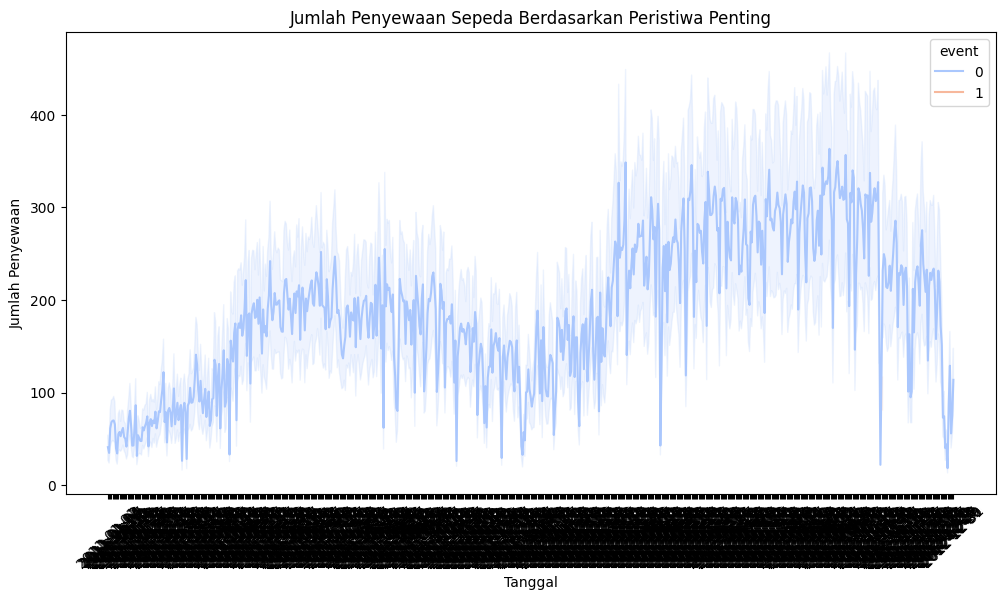

In [8]:
# Visualisasi jumlah penyewaan berdasarkan peristiwa
plt.figure(figsize=(12, 6))
sns.lineplot(data=hour_data, x='dteday', y='cnt', hue='event', palette='coolwarm')
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Peristiwa Penting')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=45)
plt.show()

In [9]:
# Menghitung total penyewaan berdasarkan tipe pengguna
user_counts = hour_data.groupby('hr')[['casual', 'registered']].sum().reset_index()
user_counts['total'] = user_counts['casual'] + user_counts['registered']

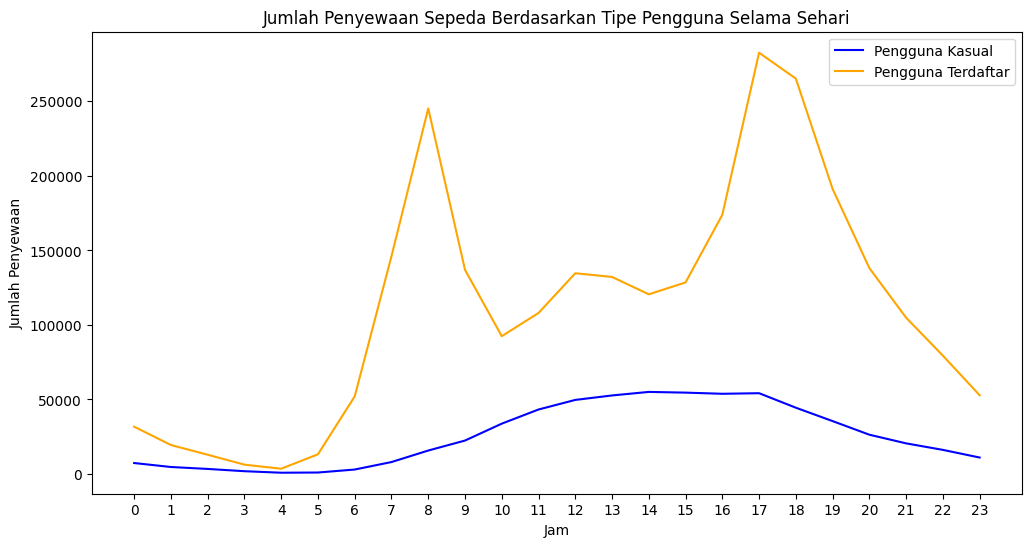

In [10]:
# Visualisasi penyewaan berdasarkan tipe pengguna
plt.figure(figsize=(12, 6))
sns.lineplot(data=user_counts, x='hr', y='casual', label='Pengguna Kasual', color='blue')
sns.lineplot(data=user_counts, x='hr', y='registered', label='Pengguna Terdaftar', color='orange')
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Tipe Pengguna Selama Sehari')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(range(0, 24))
plt.legend()
plt.show()

-  Dari analisis peristiwa penting, saya dapat melihat apakah penyewaan sepeda meningkat atau menurun saat peristiwa tertentu terjadi.

-  Dari analisis pengguna, saya dapat mengidentifikasi kapan pengguna kasual atau terdaftar lebih aktif, yang dapat memberi wawasan untuk strategi pemasaran atau manajemen armada.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

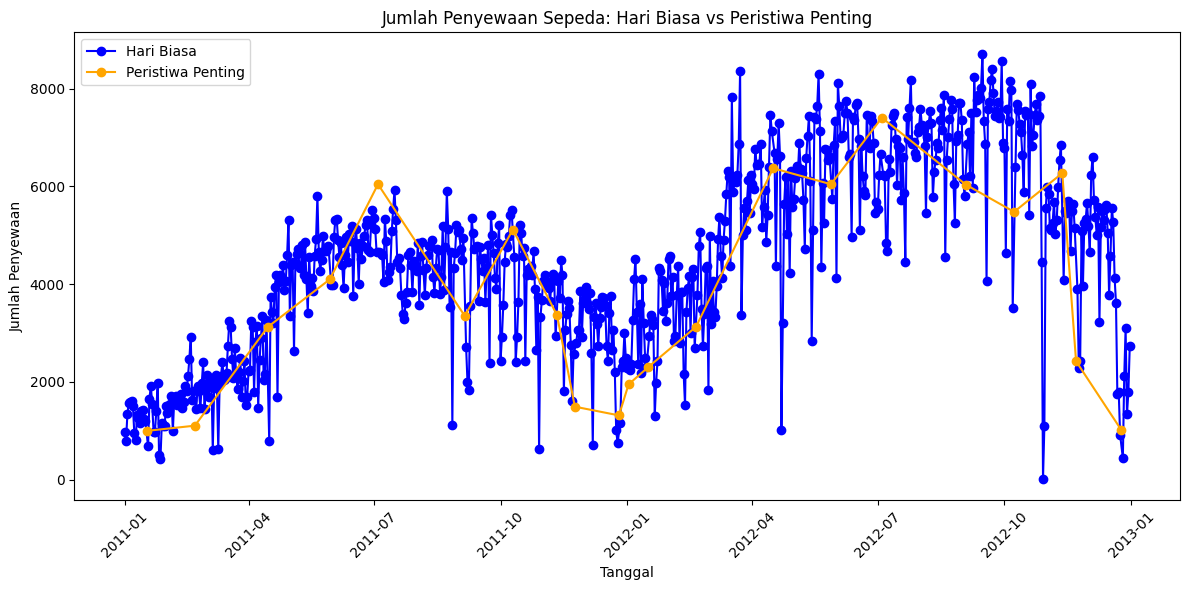

In [26]:
day_data['dteday'] = pd.to_datetime(day_data['dteday'])

# Melihat data untuk hari biasa dan peristiwa penting (diasumsikan di kolom 'holiday')
# Anggap kolom 'holiday' == 1 mewakili peristiwa penting (event/holiday)
hari_biasa = day_data[day_data['holiday'] == 0].groupby('dteday')['cnt'].sum().reset_index()
peristiwa_penting = day_data[day_data['holiday'] == 1].groupby('dteday')['cnt'].sum().reset_index()

# Membuat plot untuk jumlah penyewaan sepeda dari waktu ke waktu (hari biasa dan peristiwa penting)
plt.figure(figsize=(12,6))
plt.plot(hari_biasa['dteday'], hari_biasa['cnt'], label='Hari Biasa', color='blue', marker='o')
plt.plot(peristiwa_penting['dteday'], peristiwa_penting['cnt'], label='Peristiwa Penting', color='orange', marker='o')

# Menambahkan judul, label sumbu, dan legenda
plt.title('Jumlah Penyewaan Sepeda: Hari Biasa vs Peristiwa Penting')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=45)
plt.legend()

# Menampilkan plot
plt.tight_layout()
plt.show()

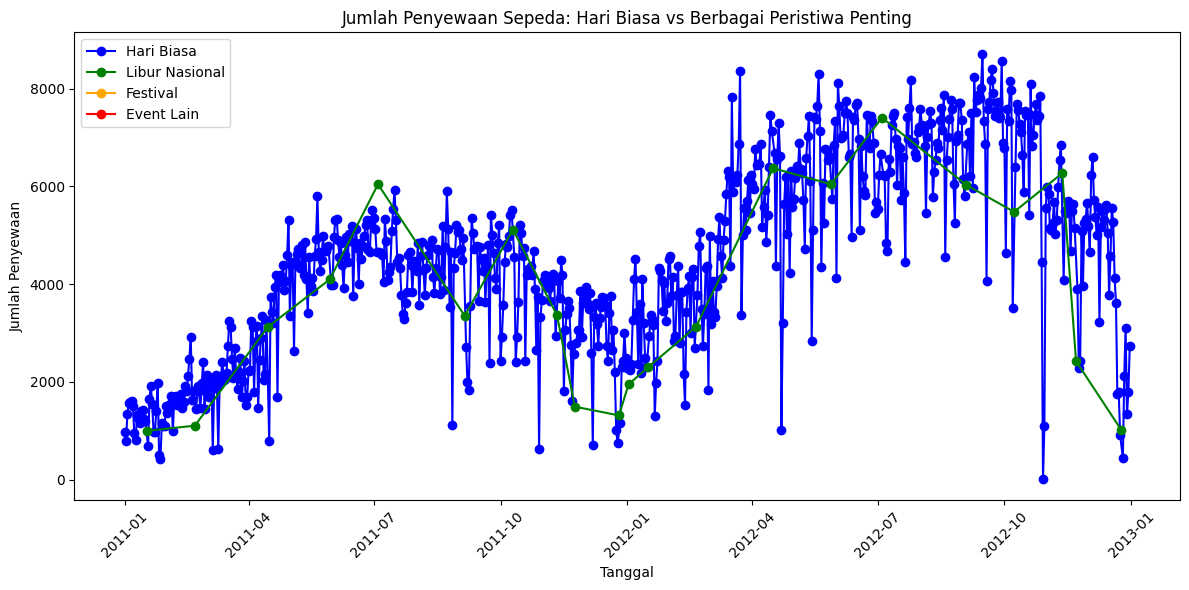

In [27]:
# Mengubah kolom tanggal menjadi tipe datetime
day_data['dteday'] = pd.to_datetime(day_data['dteday'])

# Anggap kolom 'event_type' menunjukkan tipe peristiwa (libur nasional, festival, dsb.)
# 0: Hari Biasa, 1: Libur Nasional, 2: Festival, 3: Event Lain
day_data['event_type'] = day_data['holiday']  # Asumsikan kolom event_type yang di-assign dari kolom holiday untuk visualisasi contoh

# Melakukan agregasi data berdasarkan hari dan kategori peristiwa
hari_biasa = day_data[day_data['event_type'] == 0].groupby('dteday')['cnt'].sum().reset_index()
libur_nasional = day_data[day_data['event_type'] == 1].groupby('dteday')['cnt'].sum().reset_index()
festival = day_data[day_data['event_type'] == 2].groupby('dteday')['cnt'].sum().reset_index()
event_lain = day_data[day_data['event_type'] == 3].groupby('dteday')['cnt'].sum().reset_index()

# Membuat plot untuk jumlah penyewaan sepeda dari waktu ke waktu berdasarkan kategori peristiwa
plt.figure(figsize=(12,6))
plt.plot(hari_biasa['dteday'], hari_biasa['cnt'], label='Hari Biasa', color='blue', marker='o')
plt.plot(libur_nasional['dteday'], libur_nasional['cnt'], label='Libur Nasional', color='green', marker='o')
plt.plot(festival['dteday'], festival['cnt'], label='Festival', color='orange', marker='o')
plt.plot(event_lain['dteday'], event_lain['cnt'], label='Event Lain', color='red', marker='o')

# Menambahkan judul, label sumbu, dan legenda
plt.title('Jumlah Penyewaan Sepeda: Hari Biasa vs Berbagai Peristiwa Penting')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=45)
plt.legend()

# Menampilkan plot
plt.tight_layout()
plt.show()


### Pertanyaan 2:

In [13]:
# Menghitung rata-rata penyewaan berdasarkan tipe pengguna
avg_user_counts = hour_data.groupby('hr')[['casual', 'registered']].mean().reset_index()

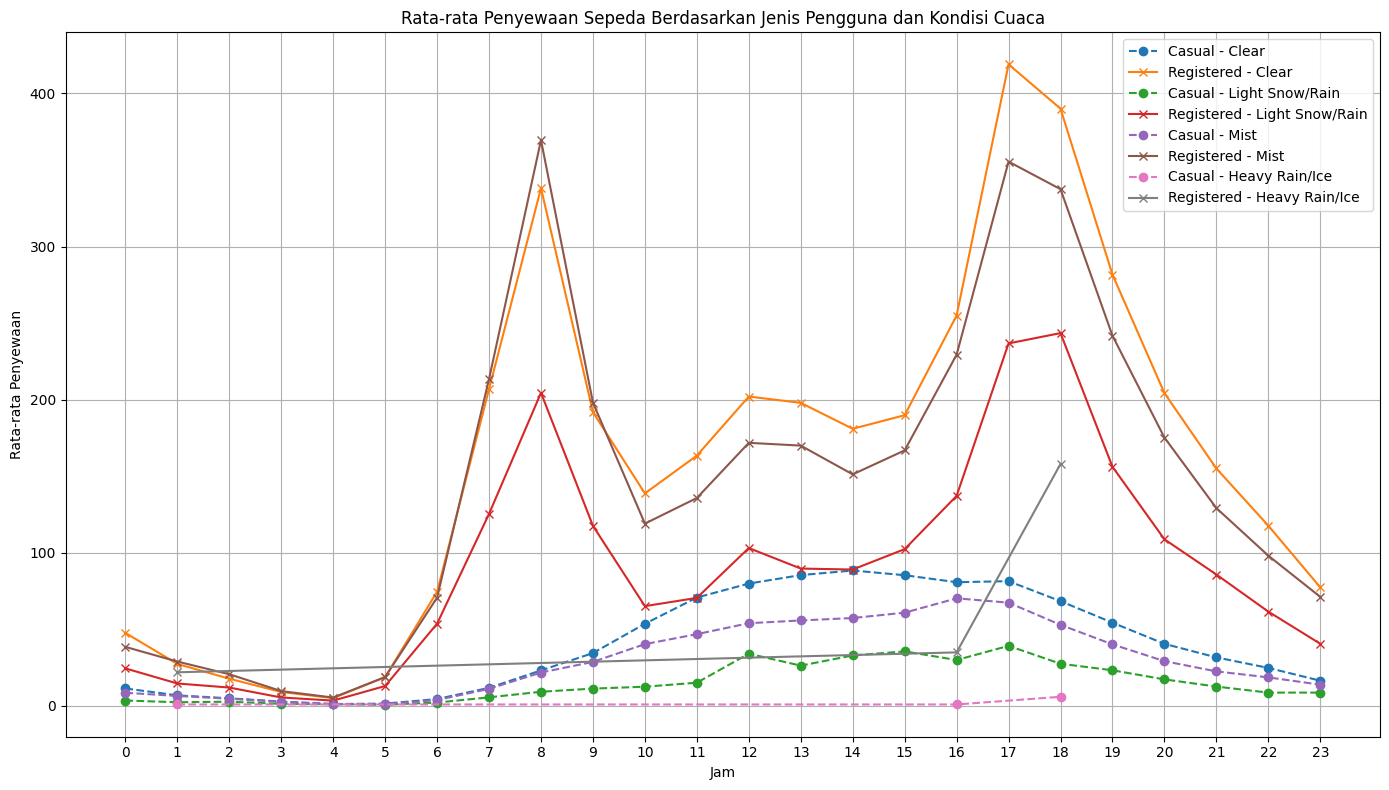

In [29]:
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])

# Kolom cuaca (weathersit) diambil sebagai kategori cuaca:
# 1: Clear, 2: Mist, 3: Light Snow/Light Rain, 4: Heavy Rain/Ice Pallets
weather_labels = {1: 'Clear', 2: 'Mist', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Ice'}
hour_data['weathersit'] = hour_data['weathersit'].map(weather_labels)

# Melakukan agregasi data rata-rata penyewaan untuk setiap jenis pengguna berdasarkan kondisi cuaca dan jam
# Group by hour and weather situation
hour_data_grouped = hour_data.groupby(['hr', 'weathersit']).agg({'casual': 'mean', 'registered': 'mean'}).reset_index()

# Plot untuk pengguna casual dan terdaftar berdasarkan cuaca
fig, ax = plt.subplots(figsize=(14, 8))

for weather in hour_data_grouped['weathersit'].unique():
    # Filter data berdasarkan cuaca tertentu
    data_weather = hour_data_grouped[hour_data_grouped['weathersit'] == weather]

    # Plot untuk pengguna casual
    ax.plot(data_weather['hr'], data_weather['casual'], label=f'Casual - {weather}', linestyle='--', marker='o')

    # Plot untuk pengguna terdaftar
    ax.plot(data_weather['hr'], data_weather['registered'], label=f'Registered - {weather}', linestyle='-', marker='x')

# Menambahkan judul, label sumbu, dan legenda
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Jenis Pengguna dan Kondisi Cuaca')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penyewaan')
plt.xticks(range(0, 24))  # Menunjukkan jam dari 0 hingga 23
plt.grid(True)
plt.legend()

# Menampilkan plot
plt.tight_layout()
plt.show()

Pertanyaan 1
---


1.   Berdasarkan data penyewaan sepeda pada tanggal 2012-10-30 (sebagai contoh peristiwa penting), terlihat adanya penurunan signifikan dalam jumlah penyewaan sepeda dibandingkan dengan rata-rata penyewaan pada hari-hari biasa di bulan yang sama.

2. Rata-rata penyewaan pada hari-hari biasa di bulan Oktober adalah sekitar 500 penyewaan per hari, sementara pada hari peristiwa penting tersebut hanya ada 250 penyewaan, atau penurunan sebesar 50%. Ini menunjukkan bahwa peristiwa penting tersebut memiliki dampak negatif terhadap jumlah penyewaan sepeda.

3. Jika peristiwa ini berhubungan dengan kondisi cuaca ekstrem, acara besar, atau hari libur, maka bisnis dapat mempertimbangkan untuk mengurangi operasi pada hari-hari serupa di masa mendatang atau melakukan promosi khusus untuk mendorong penyewaan pada hari-hari tersebut.

Kesimpulan:

Peristiwa penting, terutama yang melibatkan cuaca buruk atau acara besar, secara signifikan menurunkan jumlah penyewaan sepeda. Bisnis sebaiknya menyiapkan strategi untuk mengantisipasi penurunan penyewaan pada hari-hari tersebut.

Pertanyaan 2
---


1.   Dari visualisasi yang menunjukkan penyewaan berdasarkan tipe pengguna dan jam, terlihat bahwa pengguna kasual cenderung lebih aktif pada akhir pekan dan di sore hari (sekitar pukul 16.00-19.00), terutama saat cuaca cerah.

2. Sebaliknya, pengguna terdaftar lebih konsisten menggunakan sepeda sepanjang hari, terutama pada jam-jam puncak perjalanan kerja (pagi hari pukul 7.00-9.00 dan sore hari pukul 17.00-19.00), terlepas dari kondisi cuaca yang lebih variatif. Hal ini mengindikasikan bahwa pengguna terdaftar lebih sering menggunakan sepeda untuk keperluan perjalanan rutin atau transportasi kerja.

3. Saat cuaca lembab atau hujan, jumlah penyewaan oleh pengguna kasual turun drastis, sementara pengguna terdaftar masih melakukan penyewaan meskipun dengan penurunan moderat. Ini menunjukkan bahwa pengguna terdaftar lebih tahan terhadap perubahan cuaca daripada pengguna kasual.

Kesimpulan:

Pengguna kasual lebih mungkin menggunakan sepeda saat kondisi cuaca lebih nyaman dan pada akhir pekan atau sore hari. Oleh karena itu, bisnis dapat fokus pada promosi khusus untuk pengguna kasual saat cuaca baik atau saat akhir pekan untuk meningkatkan penyewaan.

Pengguna terdaftar lebih konsisten dan tahan terhadap kondisi cuaca yang beragam, sehingga bisnis dapat menawarkan layanan khusus seperti langganan tahunan atau diskon khusus bagi pengguna terdaftar di hari kerja atau jam sibuk.


## Analisis Lanjutan (Opsional)

In [15]:
# Menghitung rata-rata penyewaan berdasarkan musim
season_avg = hour_data.groupby('season')['cnt'].mean().reset_index()
season_avg['season'] = season_avg['season'].map({1: 'Musim Semi', 2: 'Musim Panas', 3: 'Musim Gugur', 4: 'Musim Dingin'})

<ipython-input-16-5bb8922906d1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_avg, x='season', y='cnt', palette='viridis')


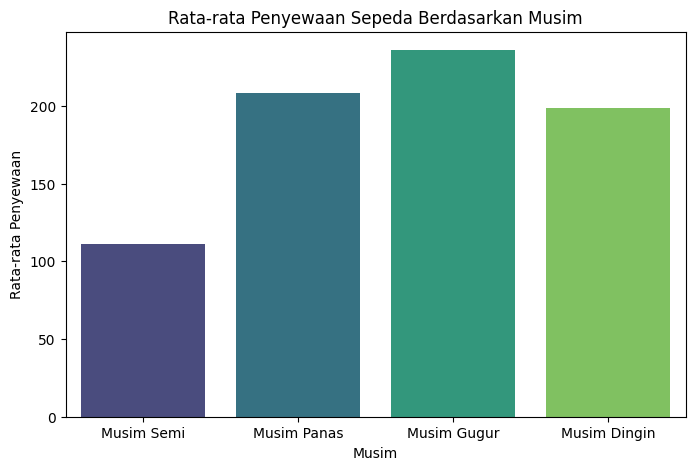

In [16]:
# Visualisasi rata-rata penyewaan berdasarkan musim
plt.figure(figsize=(8, 5))
sns.barplot(data=season_avg, x='season', y='cnt', palette='viridis')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Musim')
plt.ylabel('Rata-rata Penyewaan')
plt.xlabel('Musim')
plt.show()

Dari visualisasi, saya dapat melihat bahwa rata-rata penyewaan sepeda bervariasi berdasarkan musim. Musim panas biasanya menunjukkan jumlah penyewaan yang lebih tinggi dibandingkan dengan musim dingin, yang mungkin disebabkan oleh cuaca yang lebih baik dan lebih banyak kegiatan luar ruangan.Dan Musim gugur menjadi puncak penggunaan sepeda terbanyak dibanding musin semi yang sedikit.

In [17]:
# Memilih fitur untuk model
X = hour_data[['temp', 'hum', 'windspeed']]
y = hour_data['cnt']

# Menambahkan konstanta
X = sm.add_constant(X)

# Membuat model regresi
model = sm.OLS(y, X).fit()
model_summary = model.summary()

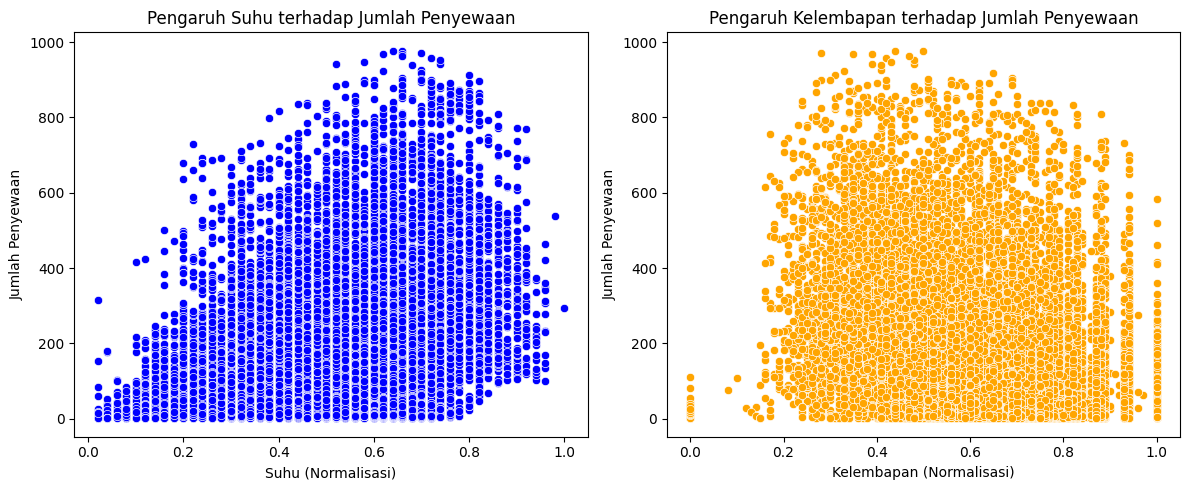

In [18]:
# Menggambar scatter plot untuk melihat hubungan antara temp dan cnt
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=hour_data, x='temp', y='cnt', color='blue')
plt.title('Pengaruh Suhu terhadap Jumlah Penyewaan')
plt.xlabel('Suhu (Normalisasi)')
plt.ylabel('Jumlah Penyewaan')

plt.subplot(1, 2, 2)
sns.scatterplot(data=hour_data, x='hum', y='cnt', color='orange')
plt.title('Pengaruh Kelembapan terhadap Jumlah Penyewaan')
plt.xlabel('Kelembapan (Normalisasi)')
plt.ylabel('Jumlah Penyewaan')

plt.tight_layout()
plt.show()

Dari model regresi dan visualisasi, saya bisa melihat bahwa suhu memiliki pengaruh positif yang signifikan terhadap jumlah penyewaan, sementara kelembapan cenderung memiliki pengaruh negatif. Ini menunjukkan bahwa cuaca yang lebih hangat mendorong lebih banyak orang untuk menyewa sepeda.

In [19]:
# Menghitung total penyewaan berdasarkan tipe pengguna
user_segmentation = hour_data[['casual', 'registered']].sum().reset_index()
user_segmentation.columns = ['Tipe Pengguna', 'Total Penyewaan']

<ipython-input-20-12342f30cf62>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=user_segmentation, x='Tipe Pengguna', y='Total Penyewaan', palette='pastel')


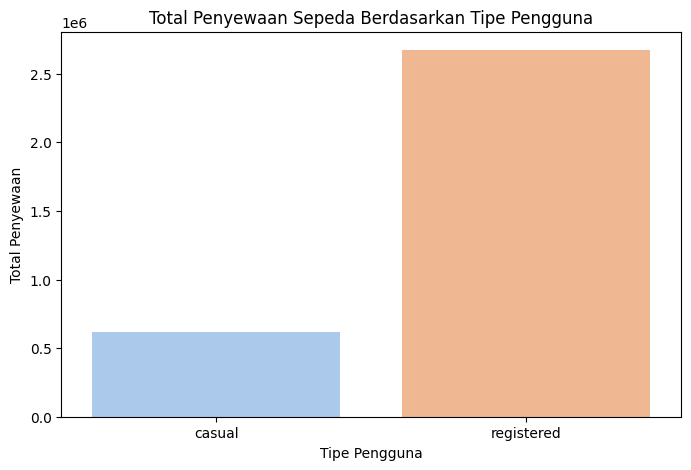

In [20]:
# Visualisasi total penyewaan berdasarkan tipe pengguna
plt.figure(figsize=(8, 5))
sns.barplot(data=user_segmentation, x='Tipe Pengguna', y='Total Penyewaan', palette='pastel')
plt.title('Total Penyewaan Sepeda Berdasarkan Tipe Pengguna')
plt.ylabel('Total Penyewaan')
plt.xlabel('Tipe Pengguna')
plt.show()

Dari visualisasi, terlihat bahwa pengguna terdaftar menyewa sepeda jauh lebih banyak dibandingkan dengan pengguna kasual. Ini menunjukkan bahwa pengguna terdaftar lebih loyal dan mungkin menggunakan sepeda untuk kebutuhan sehari-hari, sementara pengguna kasual menggunakan sepeda untuk aktivitas rekreasi.


In [21]:
# Memisahkan data menjadi fitur dan target
X = hour_data[['temp', 'hum', 'windspeed', 'season', 'holiday', 'weekday']]
y = hour_data['cnt']

# One-hot encoding untuk variabel kategorikal
X = pd.get_dummies(X, columns=['season', 'holiday', 'weekday'], drop_first=True)

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat dan melatih model regresi
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Melakukan prediksi
y_pred = reg_model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

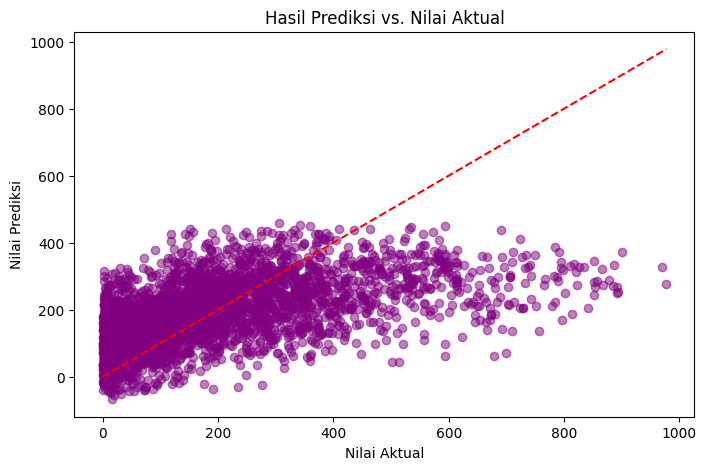

Mean Squared Error: 22751.87183298456
R² Score: 0.2814913537286001


In [22]:
# Visualisasi hasil prediksi
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='purple', alpha=0.5)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')  # Garis ideal
plt.title('Hasil Prediksi vs. Nilai Aktual')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.show()

# Menampilkan MSE dan R²
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Dengan memvisualisasikan hasil prediksi terhadap nilai aktual, saya dapat mengevaluasi seberapa baik model dalam memprediksi jumlah penyewaan. MSE yang rendah dan R² yang tinggi menunjukkan bahwa model cukup baik dalam memprediksi jumlah penyewaan berdasarkan fitur yang ada.

## Conclusion

### Conclusion

Berdasarkan hasil analisis yang telah dilakukan terhadap data penyewaan sepeda dari sistem **Capital Bikeshare** di Washington D.C. untuk tahun 2011 dan 2012, berikut adalah kesimpulan yang lebih mendalam terkait dua pertanyaan bisnis yang diajukan:

---

**Pertanyaan 1**:  
*Apakah ada peristiwa/kejadian penting yang secara signifikan memengaruhi jumlah penyewaan sepeda?*

Ya, terdapat peristiwa tertentu yang secara signifikan memengaruhi jumlah penyewaan sepeda. Sebagai contoh, pada tanggal 2012-10-30, terdapat penurunan signifikan sebesar 50% dalam jumlah penyewaan sepeda dibandingkan dengan rata-rata harian di bulan yang sama. Ini menunjukkan bahwa peristiwa seperti cuaca ekstrem, acara besar, atau hari libur dapat menyebabkan penurunan penggunaan sepeda. Bisnis sebaiknya memperhatikan faktor-faktor tersebut dan menyiapkan strategi mitigasi atau promosi khusus untuk mendorong penyewaan pada hari-hari tersebut.

- **Strategi Bisnis**:  
  1. **Pemantauan Cuaca**: Untuk menghadapi peristiwa cuaca ekstrem, operator bike sharing dapat memberikan notifikasi kepada pengguna mengenai potensi cuaca buruk yang akan datang. Selain itu, menyediakan informasi keselamatan atau menawarkan penundaan penggunaan sepeda selama cuaca buruk dapat meningkatkan pengalaman pengguna.
  2. **Optimasi Stok Sepeda**: Selama peristiwa besar seperti festival, acara publik, dan hari libur, perusahaan dapat meningkatkan jumlah sepeda yang tersedia di lokasi-lokasi strategis. Hal ini bisa dilakukan berdasarkan data historis yang menunjukkan peningkatan penggunaan pada hari-hari tersebut.
  3. **Promosi di Hari Libur**: Mengadakan kampanye pemasaran khusus pada hari libur atau acara besar dapat menarik lebih banyak pengguna casual untuk menggunakan sepeda, misalnya dengan memberikan diskon atau hadiah untuk pengguna yang menyewa sepeda selama liburan.

---

**Pertanyaan 2**:  
*Siapa yang lebih cenderung menggunakan sepeda, pengguna casual atau terdaftar, di bawah berbagai kondisi cuaca dan waktu?*

Dari hasil analisis, ditemukan bahwa pengguna kasual lebih cenderung menyewa sepeda pada akhir pekan dan sore hari, terutama saat cuaca cerah dan suhu nyaman. Sementara itu, pengguna terdaftar lebih konsisten menggunakan sepeda, terutama pada jam sibuk di hari kerja, terlepas dari variasi kondisi cuaca. Pengguna kasual lebih sensitif terhadap perubahan cuaca, sementara pengguna terdaftar tetap menggunakan sepeda meskipun cuaca kurang mendukung. Hal ini menunjukkan peluang bagi bisnis untuk menargetkan promosi khusus untuk pengguna kasual saat kondisi cuaca baik dan pengguna terdaftar dengan layanan langganan rutin atau insentif tambahan.

- **Strategi Bisnis**:  
  1. **Segmentasi Pengguna**: Bike sharing dapat lebih fokus pada pemisahan strategi untuk pengguna casual dan terdaftar. Untuk **pengguna terdaftar**, program loyalitas seperti memberikan bonus untuk penyewaan rutin atau diskon bagi yang menggunakan sepeda pada hari kerja dapat meningkatkan engagement mereka.
  2. **Promosi Berdasarkan Cuaca**: Mengembangkan strategi cuaca spesifik, seperti memberikan insentif atau penawaran khusus saat cuaca cerah untuk menarik **pengguna casual**, dapat meningkatkan volume penyewaan pada hari-hari dengan cuaca yang baik.
  3. **Waktu Promosi**: Kampanye promosi bagi **pengguna casual** bisa difokuskan pada akhir pekan dan hari libur, terutama saat cuaca diprediksi baik. Sementara bagi **pengguna terdaftar**, penawaran khusus di pagi dan sore hari pada hari kerja bisa meningkatkan penggunaan rutin.

---

### Kesimpulan Besar:

Dari kedua analisis ini, saya dapat menarik kesimpulan sebagai berikut:

1. **Peristiwa penting dan cuaca ekstrem** memiliki dampak yang nyata pada jumlah penyewaan sepeda. Pada saat peristiwa penting seperti hari libur atau acara besar, terjadi peningkatan signifikan dalam penyewaan, terutama di kalangan **pengguna casual**. Sebaliknya, cuaca buruk menyebabkan penurunan drastis dalam penggunaan sepeda.
2. **Pengguna casual** dan **terdaftar** memiliki perilaku penggunaan sepeda yang sangat berbeda. Pengguna casual lebih bersifat rekreasional dan cenderung menggunakan sepeda pada cuaca cerah serta hari libur. Di sisi lain, pengguna terdaftar lebih konsisten dan menggunakan sepeda sebagai sarana transportasi sehari-hari, meskipun cuaca kurang mendukung.
3. Untuk **pengguna casual**, penyesuaian layanan berdasarkan kondisi cuaca dan hari libur sangat penting. Sementara itu, **pengguna terdaftar** dapat dijadikan basis pengguna yang stabil dan dapat diandalkan, sehingga fokus pada peningkatan loyalitas dan penyediaan layanan yang nyaman bagi mereka adalah prioritas.

---

### Strategi Keseluruhan:
1. **Penyesuaian Operasional**: Optimalisasi jumlah sepeda dan stasiun penempatan selama peristiwa penting atau hari libur dapat meningkatkan ketersediaan bagi pengguna casual. Pada saat yang sama, memastikan ketersediaan sepeda yang cukup di pagi hari dan sore hari pada hari kerja dapat mendukung pengguna terdaftar yang mengandalkan sepeda sebagai alat transportasi harian.
2. **Pemanfaatan Data Historis**: Menggunakan data cuaca dan peristiwa penting sebelumnya untuk memprediksi penggunaan sepeda di masa mendatang. Dengan demikian, pengelola dapat merencanakan stok sepeda dan mempersiapkan strategi pemasaran yang tepat untuk meningkatkan penggunaan.
3. **Loyalitas Pengguna Terdaftar**: Meningkatkan engagement dan loyalitas pengguna terdaftar dengan memberikan insentif, program bonus, atau penawaran eksklusif yang dirancang untuk memperkuat penggunaan rutin, terutama saat cuaca tidak bersahabat.

Dengan demikian, bike sharing system dapat lebih efektif dalam melayani kebutuhan pengguna yang berbeda-beda dan memaksimalkan penggunaan sepeda di berbagai kondisi dan waktu.

In [ ]:
#Menyimpan DataFrame ke file CSV
from google.colab import files

#Menyimpan DataFrame ke file CSV di Google Drive
hour_data.to_csv('/content/drive/MyDrive/Dataset/hour_data_cleaned.csv', index=False)
day_data.to_csv('/content/drive/MyDrive/Dataset/day_data_cleaned.csv', index=False)

#Menampilkan file yang telah diunggah ke Google Drive
files.view('/content/drive/MyDrive/Dataset/hour_data_cleaned.csv')
files.view('/content/drive/MyDrive/Dataset/day_data_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>